In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/EdgeDetection/example_1.png"

# 读取灰度图像
img = cv2.imread(img_path, cv2.IMREAD_COLOR)


### 参考： cv2 方法

原理：https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

使用：https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d

其他算子：
https://www.cnblogs.com/lfri/p/10599420.html

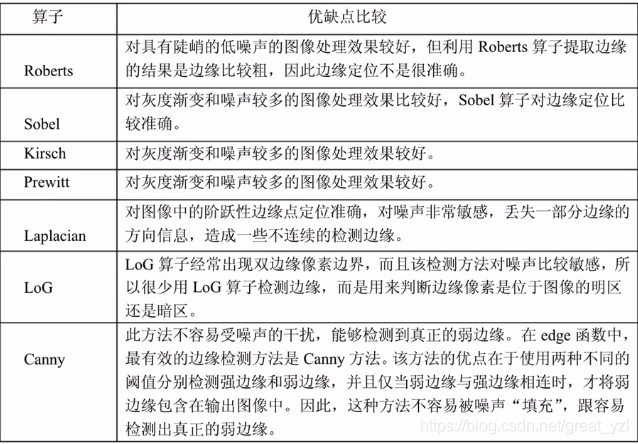

#### Parameters
src：input image.

ddepth：output image depth, see combinations; in the case of 8-bit input images
it will result in truncated derivatives.

dx：order of the derivative x.

dy：order of the derivative y.

ksize：size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

scale：optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).

delta：optional delta value that is added to the results prior to storing them in dst.

borderType：pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

284 250


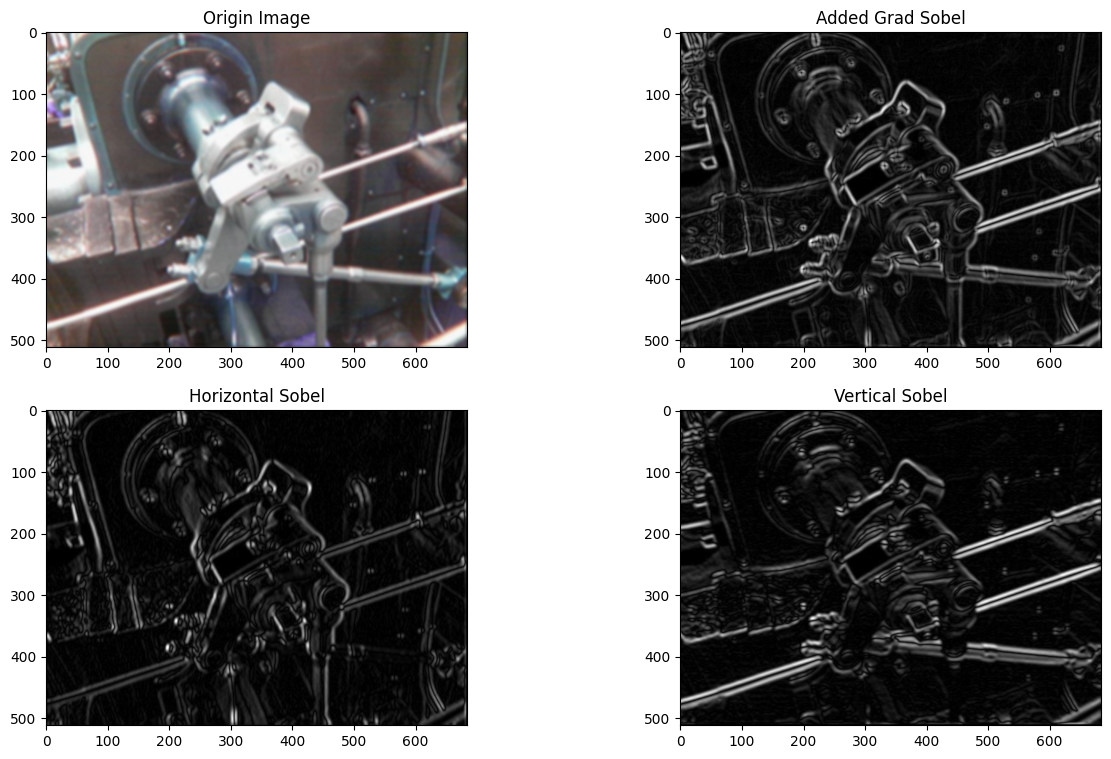

In [ ]:
"""
  直接使用cv2的实现：cv2.Sobel()

"""
scale = 1
delta = 0
ddepth = cv2.CV_16S
ksize = 3

# 使用高斯模糊
img = cv2.GaussianBlur(img, (3, 3), 0)
# 转为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 计算水平方向的 Sobel 梯度
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# 计算垂直方向的 Sobel 梯度
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# 将梯度图转换为8bitU图像（0~255）,如果计算后的值大于255，则将其取为255（8位最大值）
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
# 将x,y方向的梯度图合为一张
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

print(grad_x.max(), grad_y.max())

# 显示结果
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Origin Image')
plt.subplot(2, 2, 2), plt.imshow(grad, cmap='gray'), plt.title('Added Grad Sobel')
plt.subplot(2, 2, 3), plt.imshow(abs_grad_x, cmap='gray'), plt.title('Horizontal Sobel')
plt.subplot(2, 2, 4), plt.imshow(abs_grad_y, cmap='gray'), plt.title('Vertical Sobel')
plt.show()

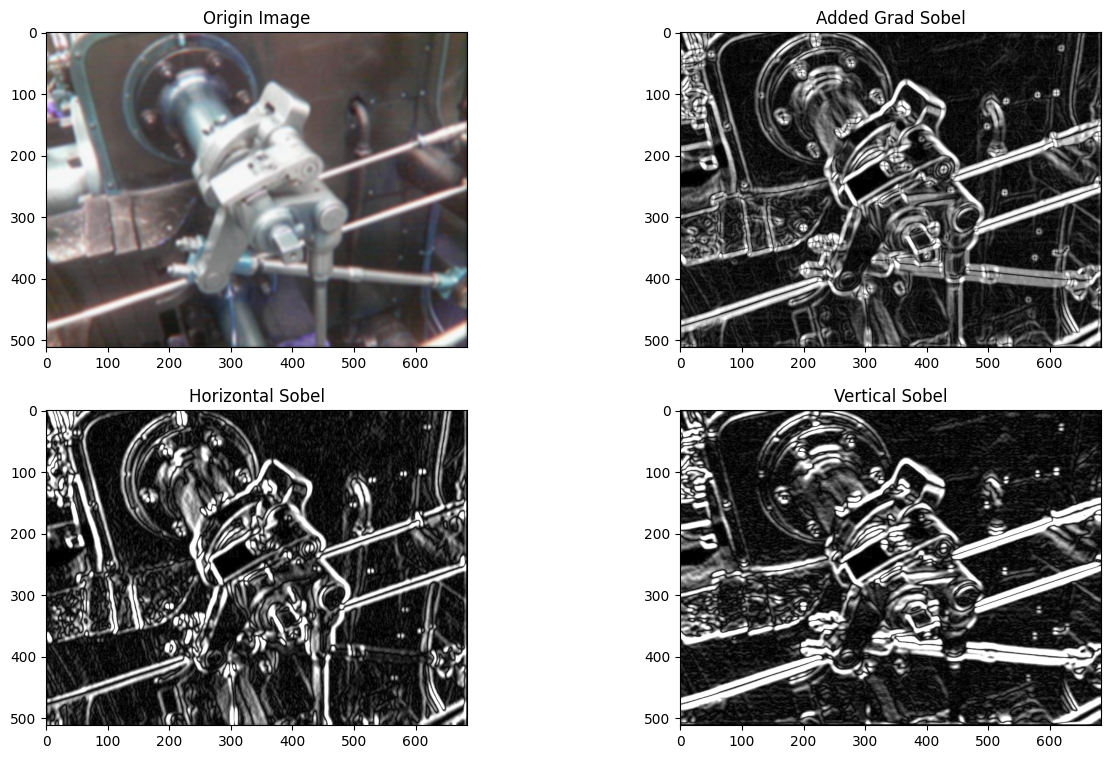

In [ ]:
"""
  直接使用cv2的实现：cv2.Sobel()
  这次使用Scharr核，速度更快，更加精确，使用的核如下：
  Gx=[
    [-3, 0, +3],
    [-10, 0, +10],
    [-3, 0, +3]
  ]
  Gy=[
    [-3, -10, -3],
    [0, 0, 0],
    [+3, +10, +3]
  ]

"""
scale = 1
delta = 0
ddepth = cv2.CV_16S
ksize = 3

# 使用高斯模糊
img = cv2.GaussianBlur(img, (3, 3), 0)
# 转为灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 计算水平方向的 Sobel 梯度
grad_x = cv2.Scharr(gray, ddepth, 1, 0)
# 计算垂直方向的 Sobel 梯度
grad_y = cv2.Scharr(gray, ddepth, 0, 1)
# 将梯度图转换为8bitU图像（0~255）,如果计算后的值大于255，则将其取为255（8位最大值）
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
# 将x,y方向的梯度图合为一张
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# 显示结果
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Origin Image')
plt.subplot(2, 2, 2), plt.imshow(grad, cmap='gray'), plt.title('Added Grad Sobel')
plt.subplot(2, 2, 3), plt.imshow(abs_grad_x, cmap='gray'), plt.title('Horizontal Sobel')
plt.subplot(2, 2, 4), plt.imshow(abs_grad_y, cmap='gray'), plt.title('Vertical Sobel')
plt.show()

use kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
use kernel:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
use kernel:
[[ -3   0   3]
 [-10   0  10]
 [ -3   0   3]]
use kernel:
[[ -3 -10  -3]
 [  0   0   0]
 [  3  10   3]]


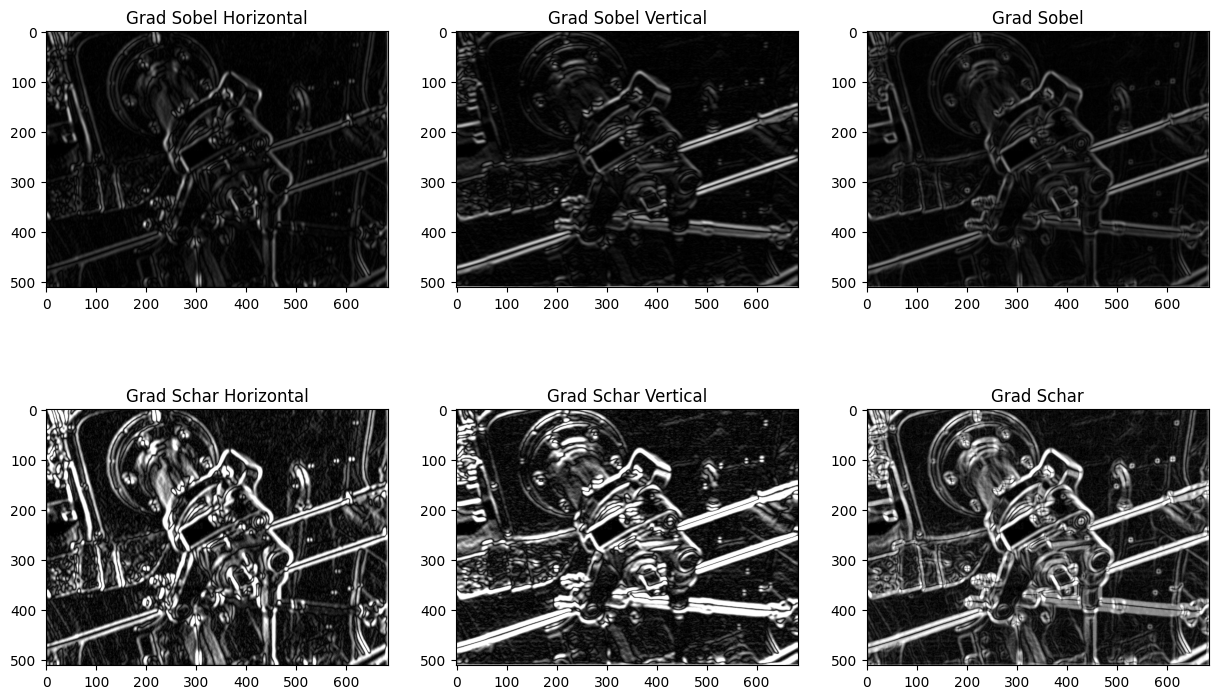

In [ ]:
"""
  自己实现一个简单的Sobel卷积算法
"""
import numpy as np
import cv2
from scipy.signal import convolve2d

def my_sobel(img, kernel, order='x'):
  # define kernel
  if kernel == "Sobel":
    a = np.array([1,2,1]) # Sobel算子
  else:
    a = np.array([3,10,3]) # Schar算子
  b = np.array([-1,0,1])
  kernel = np.outer(a,b)
  if order == 'y':
    kernel = kernel.T
  print(f"use kernel:\n{kernel}")
  # convolution
  grad = convolve2d(img, kernel, mode="same")
  return grad

def my_edge_detec(img, kernel="Sobel"):
  # 使用高斯模糊
  img = cv2.GaussianBlur(img, (3, 3), 0)
  # 转为灰度图
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # 计算水平方向的 Sobel 梯度
  grad_x = my_sobel(gray, kernel=kernel, order='x')
  # 计算垂直方向的 Sobel 梯度
  grad_y = my_sobel(gray, kernel=kernel, order='y')
  # 将梯度图转换为8bitU图像（0~255）,如果计算后的值大于255，则将其取为255（8位最大值）
  abs_grad_x = cv2.convertScaleAbs(grad_x)
  abs_grad_y = cv2.convertScaleAbs(grad_y)
  # 将x,y方向的梯度图合为一张
  grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
  return abs_grad_x,abs_grad_y,grad

(sobel_grad_x, sobel_grad_y, sobel_grad) = my_edge_detec(img, kernel="Sobel")
(schar_grad_x, schar_grad_y, schar_grad) = my_edge_detec(img, kernel="Schar")

# 显示结果
plt.figure(figsize=(15, 9))
plt.subplot(2, 3, 1), plt.imshow(sobel_grad_x, cmap='gray'), plt.title('Grad Sobel Horizontal')
plt.subplot(2, 3, 2), plt.imshow(sobel_grad_y, cmap='gray'), plt.title('Grad Sobel Vertical')
plt.subplot(2, 3, 3), plt.imshow(sobel_grad, cmap='gray'), plt.title('Grad Sobel')
plt.subplot(2, 3, 4), plt.imshow(schar_grad_x, cmap='gray'), plt.title('Grad Schar Horizontal')
plt.subplot(2, 3, 5), plt.imshow(schar_grad_y, cmap='gray'), plt.title('Grad Schar Vertical')
plt.subplot(2, 3, 6), plt.imshow(schar_grad, cmap='gray'), plt.title('Grad Schar')
plt.show()
